In [67]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [68]:
def get_data():
    #get train data
    train_data_path ='train.csv'
    train = pd.read_csv(train_data_path)
    
    #get test data
    seed = 7
    np.random.seed(seed)
    train, validation = train_test_split(train, test_size=0.2, random_state=seed)    
    return train,validation 

In [69]:
train , validation = get_data()
train_target = train.Servidas
train.drop(['Servidas'],axis = 1 , inplace = True)
validation_target=validation.Servidas
validation.drop(['Servidas'],axis = 1 , inplace = True)

In [70]:
model = SVR(kernel='rbf',gamma=0.001, C=1.0, epsilon=0.2)
model.fit(train, train_target) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [71]:
predict1 = model.predict(validation)
print('SVM MAE = ', mean_absolute_error(validation_target , predict1))
print('SVM R2 = ', r2_score(validation_target , predict1))

SVM MAE =  2450.71082785
SVM R2 =  -0.0399533715884


In [72]:
model = SVR(kernel='linear',gamma=0.001, C=1.0, epsilon=0.2)
model.fit(train, train_target) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.001,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [73]:
predict2 = model.predict(validation)
print('SVM MAE = ', mean_absolute_error(validation_target , predict2))
print('SVM R2 = ', r2_score(validation_target , predict2))

SVM MAE =  1885.3747274
SVM R2 =  0.371842815036


In [74]:
model = SVR(kernel='poly',gamma=0.001, C=1.0, epsilon=0.2)
model.fit(train, train_target) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.001,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [75]:
predict3 = model.predict(validation)
print('SVM MAE = ', mean_absolute_error(validation_target , predict3))
print('SVM R2 = ', r2_score(validation_target , predict3))

SVM MAE =  2199.51190224
SVM R2 =  0.155013496887


In [76]:
# Plot the results
validation_=validation.values[100:110,:]
validation_target_=validation_target.values.reshape((validation_target.shape[0],1))[100:110,:]
predict1_=predict1.reshape((predict1.shape[0],1))[100:110,:]
predict2_=predict2.reshape((predict2.shape[0],1))[100:110,:]
predict3_=predict3.reshape((predict2.shape[0],1))[100:110,:]
validation_reduced = PCA(n_components=1).fit_transform(validation_)

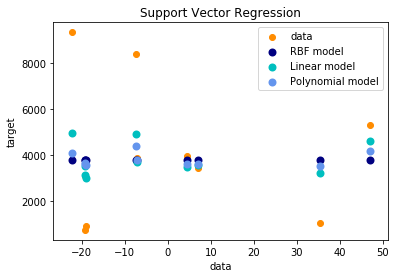

In [82]:
# Look at the results
lw = 2
plt.scatter(validation_reduced, validation_target_, color='darkorange', label='data')
plt.scatter(validation_reduced, predict1_, color='navy', lw=lw, label='RBF model')
plt.scatter(validation_reduced, predict2_, color='c', lw=lw, label='Linear model')
plt.scatter(validation_reduced, predict3_, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()